In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("housing.csv")

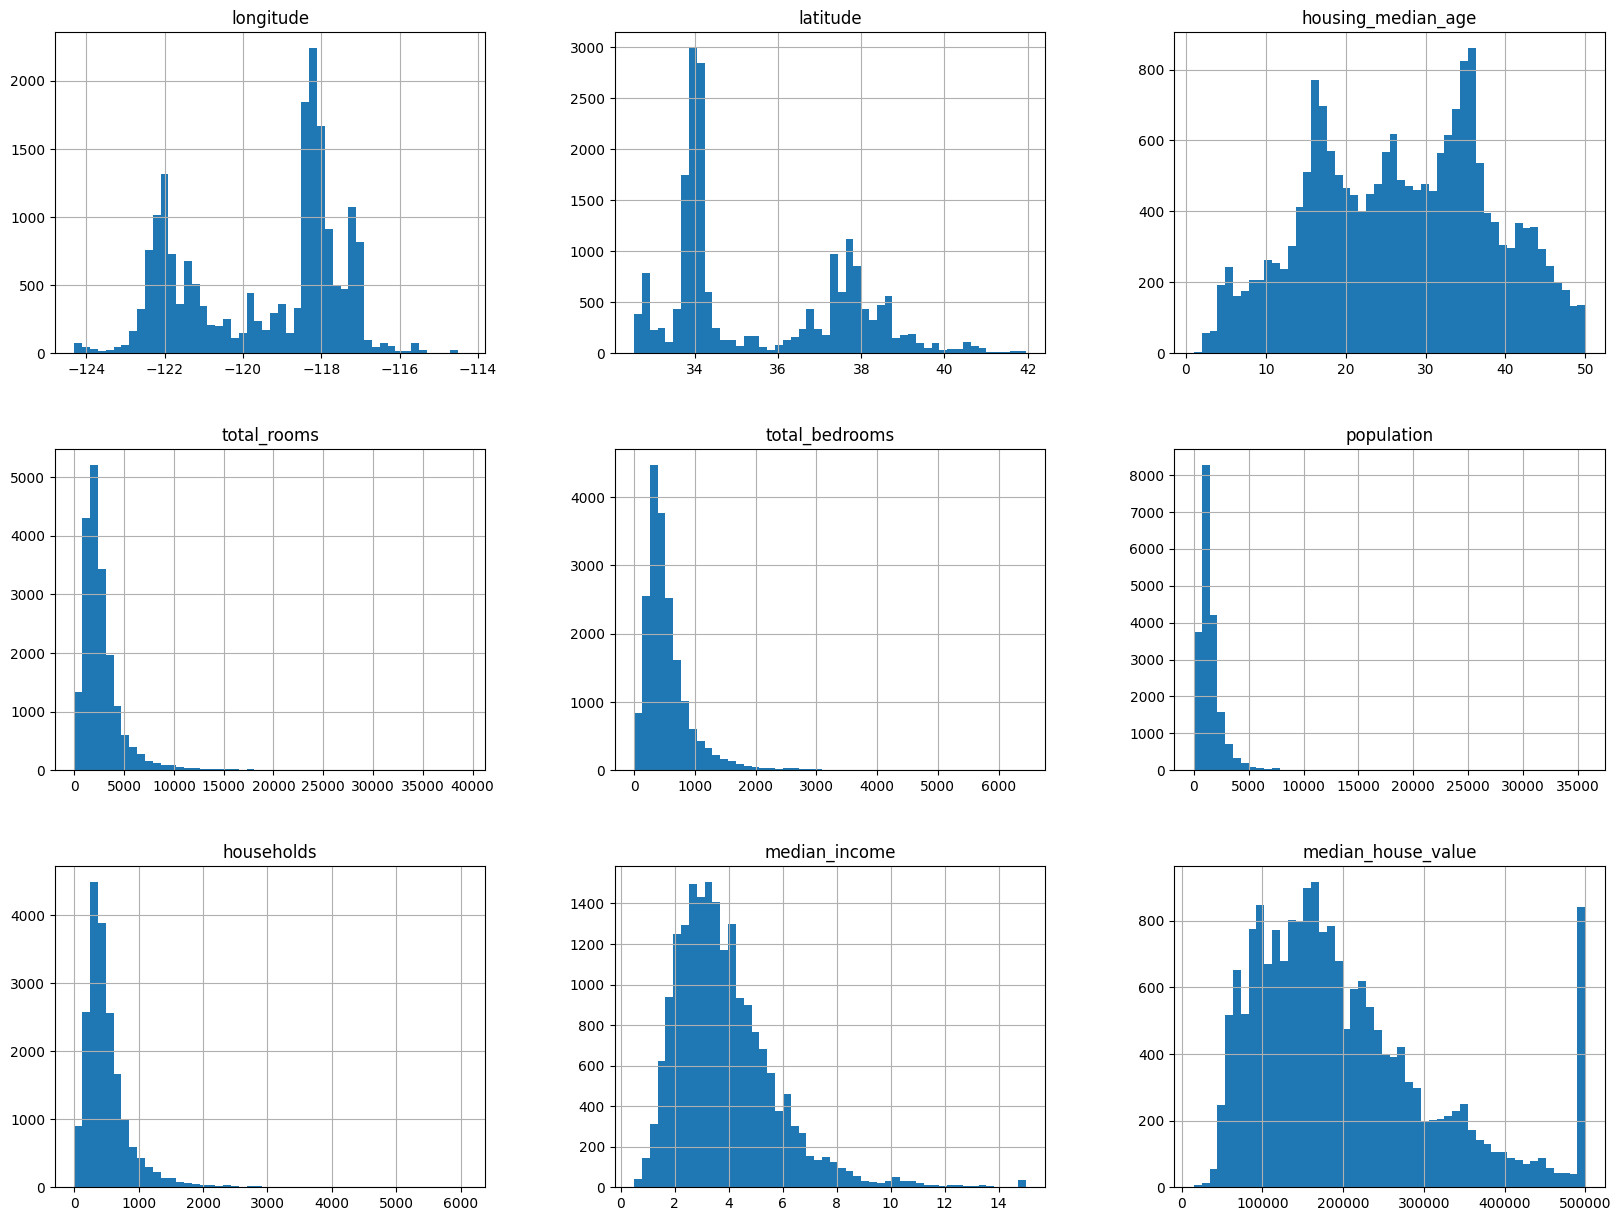

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [3]:
f= df[df.median_house_value <= 500000]

In [4]:
df=df[df.housing_median_age <= 50]

In [78]:
df_vis = df.copy()

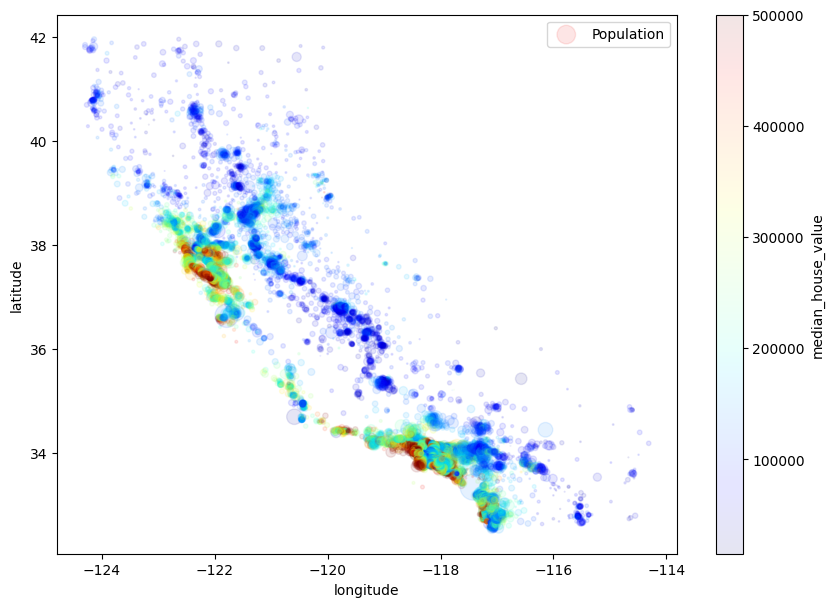

In [79]:
df_vis.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,s=df_vis['population']/100,label="Population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [80]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

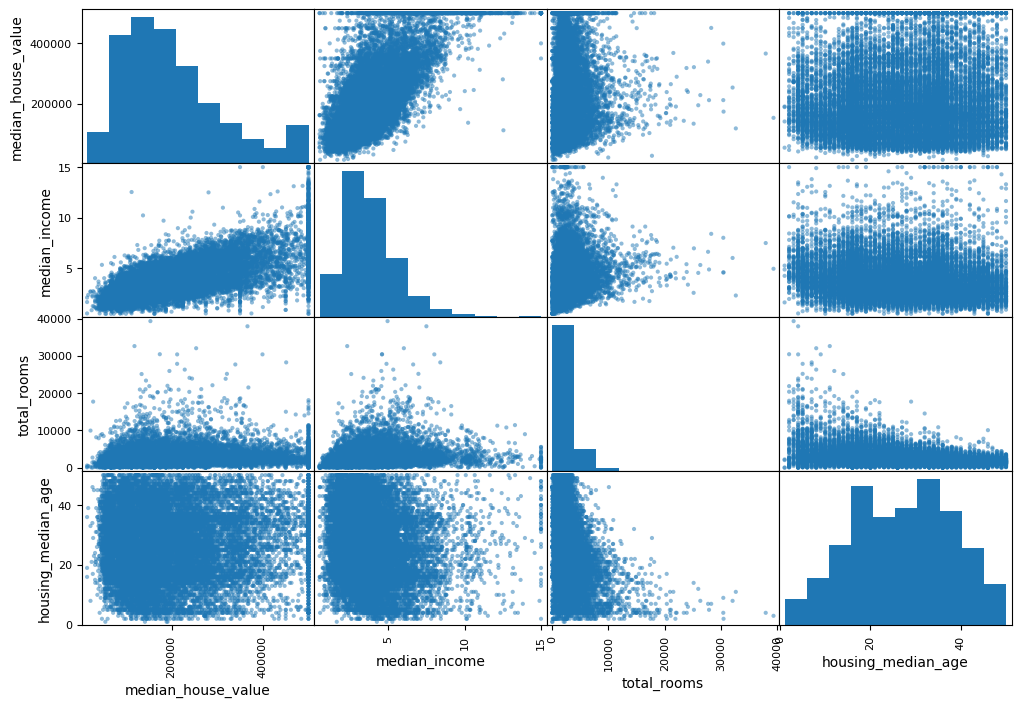

In [81]:
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(df_vis[attributes],figsize=(12,8))

In [5]:
df_num = df.drop("ocean_proximity",axis=1)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

In [7]:
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,population_ix]/X[:,household_ix]
            return np.c_[X,rooms_per_household,population_per_household]
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values


In [8]:
num_attribs=list(df_num)
cat_attribs=['ocean_proximity']

In [9]:
num_pipeline=Pipeline([('selector',DataFrameSelector(num_attribs)),('imputer',SimpleImputer(strategy='median')),('attr_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler()),])

In [10]:
cat_pipeline=Pipeline([('selector',DataFrameSelector(cat_attribs)),('encoder',OrdinalEncoder()),])

In [11]:
full_pipeline=FeatureUnion(transformer_list=[("num",num_pipeline),('cat_',cat_pipeline),])

In [12]:
house_prepared=full_pipeline.fit_transform(df)

In [13]:
house_prepared[:,11]

array([3., 3., 3., ..., 1., 1., 1.])

In [15]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [20]:
house_prepared_df=pd.DataFrame(house_prepared,columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value','rooms per household','population per household','ocean_proximity'])

In [30]:
X=house_prepared_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','rooms per household','population per household','ocean_proximity']]

In [31]:
y=house_prepared_df['median_house_value']

In [32]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms per household,population per household,ocean_proximity
0,-1.392313,1.084336,1.226452,-0.810765,-0.975868,-0.984583,-0.980203,2.382311,0.605671,-0.050139,3.0
1,-1.387249,1.074965,-0.531224,1.976621,1.310470,0.815649,1.617743,2.369582,0.310769,-0.092180,3.0
2,-1.407506,1.065593,1.314336,-0.060022,0.278459,-0.219117,0.223786,-0.957373,-0.457734,-0.100004,3.0
3,-1.407506,1.070279,2.017406,-0.703195,-0.615483,-0.659866,-0.625938,-0.933521,-0.478169,-0.042160,3.0
4,-1.407506,1.065593,2.017406,-0.201654,-0.212975,-0.406154,-0.228031,-1.005130,-0.042826,-0.068323,3.0
...,...,...,...,...,...,...,...,...,...,...,...
19314,-0.814991,1.834067,-0.179689,-0.458924,-0.402529,-0.531711,-0.456507,-1.235520,-0.160718,-0.049663,1.0
19315,-0.875762,1.838753,-0.794875,-0.892786,-0.926725,-0.955142,-1.011009,-0.702597,0.261710,0.003366,1.0
19316,-0.880826,1.810638,-0.882759,-0.194931,-0.142771,-0.391433,-0.192091,-1.160809,-0.097432,-0.071826,1.0
19317,-0.931468,1.810638,-0.794875,-0.371524,-0.320623,-0.621766,-0.407731,-1.071391,-0.048425,-0.090919,1.0


In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

In [41]:
house_prepared_df.sort_index()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms per household,population per household,ocean_proximity
0,-1.392313,1.084336,1.226452,-0.810765,-0.975868,-0.984583,-0.980203,2.382311,2.232235,0.605671,-0.050139,3.0
1,-1.387249,1.074965,-0.531224,1.976621,1.310470,0.815649,1.617743,2.369582,1.393076,0.310769,-0.092180,3.0
2,-1.407506,1.065593,1.314336,-0.060022,0.278459,-0.219117,0.223786,-0.957373,0.217718,-0.457734,-0.100004,3.0
3,-1.407506,1.070279,2.017406,-0.703195,-0.615483,-0.659866,-0.625938,-0.933521,-0.555450,-0.478169,-0.042160,3.0
4,-1.407506,1.065593,2.017406,-0.201654,-0.212975,-0.406154,-0.228031,-1.005130,-0.388688,-0.042826,-0.068323,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19314,-0.814991,1.834067,-0.179689,-0.458924,-0.402529,-0.531711,-0.456507,-1.235520,-1.107458,-0.160718,-0.049663,1.0
19315,-0.875762,1.838753,-0.794875,-0.892786,-0.926725,-0.955142,-1.011009,-0.702597,-1.116376,0.261710,0.003366,1.0
19316,-0.880826,1.810638,-0.882759,-0.194931,-0.142771,-0.391433,-0.192091,-1.160809,-0.980826,-0.097432,-0.071826,1.0
19317,-0.931468,1.810638,-0.794875,-0.371524,-0.320623,-0.621766,-0.407731,-1.071391,-1.048601,-0.048425,-0.090919,1.0


In [42]:
house_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19319 entries, 0 to 19318
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 19319 non-null  float64
 1   latitude                  19319 non-null  float64
 2   housing_median_age        19319 non-null  float64
 3   total_rooms               19319 non-null  float64
 4   total_bedrooms            19319 non-null  float64
 5   population                19319 non-null  float64
 6   households                19319 non-null  float64
 7   median_income             19319 non-null  float64
 8   median_house_value        19319 non-null  float64
 9   rooms per household       19319 non-null  float64
 10  population per household  19319 non-null  float64
 11  ocean_proximity           19319 non-null  float64
dtypes: float64(12)
memory usage: 1.8 MB


In [45]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(house_prepared_df,house_prepared_df['ocean_proximity']):
  strat_train_set=house_prepared_df.iloc[test_index]
  strat_test_set=house_prepared_df.iloc[test_index]

In [46]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms per household,population per household,ocean_proximity
3000,-1.741745,1.595091,-0.619108,-0.278746,-0.379127,-0.480622,-0.448805,-0.469106,-0.607173,0.298542,-0.035127,0.0
18893,0.126955,-0.593187,-0.794875,-0.437410,-0.706750,-0.665927,-0.690116,1.645952,1.801508,0.678108,-0.018874,4.0
6007,0.684020,-0.644731,1.402219,-0.478645,-0.423590,-0.384506,-0.459074,-0.508360,0.355943,-0.207524,-0.000190,1.0
9601,0.835947,-0.766563,-1.146411,-0.328496,-0.617824,-0.682380,-0.613102,1.451180,0.928461,0.719225,-0.055905,0.0
5551,0.805562,-0.677532,0.699149,-0.546324,-0.713770,-0.497074,-0.672146,0.563315,-0.298619,0.206988,0.048146,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15024,-0.916276,1.112451,1.138568,0.061890,0.255057,0.500457,0.169876,-0.984166,-1.234981,-0.208301,0.043544,1.0
3083,0.592864,-0.611931,0.874917,-0.557977,-0.702069,-0.723077,-0.690116,1.010456,0.330973,0.233170,-0.044921,0.0
8327,0.542222,-0.733762,0.962800,-1.059966,-1.113938,-1.031342,-1.116262,-0.706234,0.616341,-0.400714,0.055094,0.0
8223,0.557414,-0.705647,2.017406,-0.528844,-0.596762,-0.665927,-0.638774,1.264162,2.654944,0.147945,-0.039901,0.0


In [56]:
X_train=strat_train_set[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','rooms per household','population per household','ocean_proximity']]
X_test=strat_test_set[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','rooms per household','population per household','ocean_proximity']]

In [57]:
y_train=strat_train_set['median_house_value']
y_test=strat_test_set['median_house_value']

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lin_reg2=LinearRegression()

In [55]:
lin_reg2.fit(X_train,y_train)

LinearRegression()

In [59]:
print("Predictions:",lin_reg2.predict(X_test))

Predictions: [-0.36210021  1.28403576 -0.23861555 ... -0.26350944  1.16350559
 -0.75056392]


In [60]:
print("Labels:",y_test)

Labels: 3000    -0.607173
18893    1.801508
6007     0.355943
9601     0.928461
5551    -0.298619
           ...   
15024   -1.234981
3083     0.330973
8327     0.616341
8223     2.654944
4184     0.648445
Name: median_house_value, Length: 3864, dtype: float64


In [62]:
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(y_test,lin_reg2.predict(X_test))

In [63]:
lin_mse

0.35942786569831

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(lin_reg2,X_test,y_test,scoring="neg_mean_squared_error",cv=10)
regressor_rmse_scores=np.sqrt(-scores)

In [66]:
print("Mean:",regressor_rmse_scores.mean())

Mean: 0.6031507011429273


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [68]:
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]

In [69]:
forest_reg=RandomForestRegressor()

In [70]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

In [71]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [72]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [73]:
cvres=grid_search.cv_results_

In [74]:
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score),params)

0.6188674738337591 {'max_features': 2, 'n_estimators': 3}
0.5364036128916765 {'max_features': 2, 'n_estimators': 10}
0.5087068528259352 {'max_features': 2, 'n_estimators': 30}
0.5885050351402258 {'max_features': 4, 'n_estimators': 3}
0.5159277211929303 {'max_features': 4, 'n_estimators': 10}
0.48992087694615577 {'max_features': 4, 'n_estimators': 30}
0.5780202788414895 {'max_features': 6, 'n_estimators': 3}
0.5162995718928322 {'max_features': 6, 'n_estimators': 10}
0.4998627548181444 {'max_features': 6, 'n_estimators': 30}
0.6145303672458517 {'max_features': 8, 'n_estimators': 3}
0.5248078553452034 {'max_features': 8, 'n_estimators': 10}
0.5097767118962165 {'max_features': 8, 'n_estimators': 30}
0.5922846216805538 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.521211196945499 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.5805489099786613 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.511673725964908 {'bootstrap': False, 'max_features': 3, 'n_

In [75]:
feature_importance=grid_search.best_estimator_.feature_importances_

In [76]:
feature_importance

array([0.07994606, 0.07948751, 0.04506591, 0.02643218, 0.02234209,
       0.02702633, 0.02266604, 0.38974959, 0.07748518, 0.11736071,
       0.11243841])

In [78]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
